In [1]:
from datascience import *
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

## Pea Flowers

In [22]:
total_plants = 929
observed = 705 / 929 # were purple
observed_statistic = abs(observed - 0.75)
observed_statistic

0.008880516684607098

In [2]:
null = make_array('Purple', 'Purple', 'Purple', 'White')
null

array(['Purple', 'Purple', 'Purple', 'White'], 
      dtype='<U6')

In [14]:
sample = np.random.choice(null, 10)
sample

array(['Purple', 'White', 'Purple', 'Purple', 'Purple', 'Purple', 'White',
       'Purple', 'Purple', 'Purple'], 
      dtype='<U6')

In [50]:
abs(np.count_nonzero(sample == 'Purple') / len(sample) - 0.75)

0.050000000000000044

In [42]:
def test_stat(sample):
    prop_purple = abs(np.count_nonzero(sample == 'Purple')
                      / len(sample)
                      - 0.75)
    return prop_purple

In [51]:
test_stat(np.random.choice(null, total_plants))

-0.0008073196986005948

In [44]:
repetitions = 5000
sample_stats = make_array()

for i in np.arange(repetitions):
    stat = test_stat(np.random.choice(null, total_plants))
    sample_stats = np.append(sample_stats, stat)
    
sample_stats

array([ 0.02556512,  0.00026911,  0.01318622, ...,  0.01533907,
        0.00941873,  0.00080732])

In [45]:
null_dist = Table().with_columns('Null distribution', sample_stats)
null_dist

Null distribution
0.0255651
0.000269107
0.0131862
0.0104952
0.0239505
0.00565124
0.00296017
0.00188375
0.0040366
0.00888052


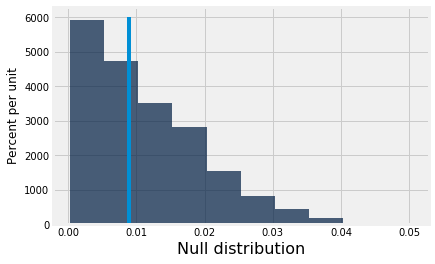

In [46]:
null_dist.hist()
_ = plt.plot([observed_statistic, observed_statistic], [0, 60])

In [47]:
observed_statistic

0.008880516684607098

In [48]:
# compute the p-value
np.count_nonzero(sample_stats >= observed_statistic) / len(sample_stats)

0.5378

In [30]:
sam_tried_again = 0.03

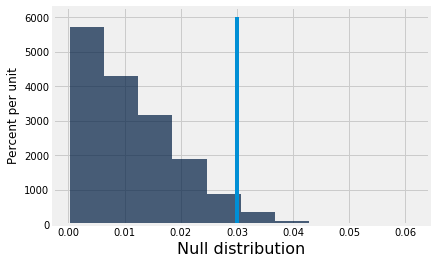

In [31]:
null_dist.hist()
_ = plt.plot([sam_tried_again, sam_tried_again], [0, 60])

In [36]:
np.count_nonzero(sample_stats >= sam_tried_again) / len(sample_stats)

0.0334

## Discussion Question: What Happens If...

I remove the absolute value from the test statistic?

In [49]:
def test_stat(sample):
    prop_purple = (np.count_nonzero(sample == 'Purple')
                   / len(sample)
                   - 0.75)
    return prop_purple

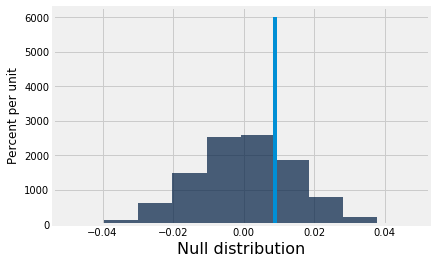

In [52]:
repetitions = 5000
sample_stats = make_array()

for i in np.arange(repetitions):
    stat = test_stat(np.random.choice(null, total_plants))
    sample_stats = np.append(sample_stats, stat)
    
null_dist = Table().with_columns('Null distribution', sample_stats)
null_dist.hist()
_ = plt.plot([observed_statistic, observed_statistic], [0, 60])

In [53]:
# compute the p-value
np.count_nonzero(sample_stats >= observed_statistic) / len(sample_stats)

# the previous p-value was around 0.54. Why is it different this time?

0.283